<a href="https://colab.research.google.com/github/Beowoulfk/ML/blob/main/MLP_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales

## Red Neuronal Densamente Conectada (Fully Connected Neural Networks)

In [ ]:
%matplotlib inline

import cv2

import matplotlib.pyplot as plt

import numpy as np

import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
yname = np.arange(10)
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# yname = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

# Escalar las imágenes en el rango [0,1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [ ]:
print(f'''
Tamaños:

x_train: {x_train.shape}
y_train: {y_train.shape}

x_test: {x_test.shape}
y_test: {y_test.shape}''')


Tamaños:

x_train: (60000, 28, 28)
y_train: (60000,)

x_test: (10000, 28, 28)
y_test: (10000,)


5906


Text(0.5, 1.0, 'Clase 7')

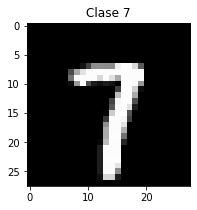

In [ ]:
n = np.random.randint(0,60000)
print(n)

plt.figure(figsize=(3,3))
plt.imshow(x_train[n,...], cmap='gray')
plt.title(f"Clase {yname[y_train[n]]}")

<img src='figures/FCNN.png' width=400>

*Imagen ejemplo de red densamente conectada, la realizada tiene en la primera capa 784 unidades, en la segunda 200 y en la final 10 (número de clases)*

__Hecho con:__ http://alexlenail.me/NN-SVG/index.html

In [ ]:
#Las imágenes de 28x28 se deben convertir en vectores de 1x784

x_train = np.reshape(x_train,(-1,784))
x_test = np.reshape(x_test,(-1,784))

# x_train = np.reshape(x_train,(-1,x_train.shape[1]*x_train.shape[2]))
# x_test = np.reshape(x_test,(-1,x_test.shape[1]*x_test.shape[2]))

print(f'''
Tamaños:

x_train: {x_train.shape}
y_train: {y_train.shape}

x_test: {x_test.shape}
y_test: {y_test.shape}''')


Tamaños:

x_train: (60000, 784)
y_train: (60000,)

x_test: (10000, 784)
y_test: (10000,)


In [ ]:
np.unique(y_train) #one_hot_encoding

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
#Se crea la red y se entrena con train, se valida con test
num_classes = 10
input_shape = (784,)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
#         keras.layers.Dense(400, input_dim=input_shape, activation='relu'),
#         keras.layers.Dense(200, input_dim=input_shape, activation='relu'),
        keras.layers.Dense(200, input_dim=input_shape, activation='relu'),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Optimizers: https://keras.io/api/optimizers/

batch_size = 128
epochs = 15

opt = keras.optimizers.SGD(learning_rate=1e-2)#, momentum=0.1)
# opt = keras.optimizers.Adam(learning_rate=1e-2)
# opt = keras.optimizers.Nadam(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_split=0.1, shuffle=False, verbose=1)

Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 1.2051 - accuracy: 0.7184 - val_loss: 0.6169 - val_accuracy: 0.8805
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.5746 - accuracy: 0.8604 - val_loss: 0.4206 - val_accuracy: 0.9008
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 0.4564 - accuracy: 0.8810 - val_loss: 0.3541 - val_accuracy: 0.9112
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 0.4042 - accuracy: 0.8916 - val_loss: 0.3198 - val_accuracy: 0.9177
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 0.3732 - accuracy: 0.8973 - val_loss: 0.2981 - val_accuracy: 0.9212
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 0.3516 - accuracy: 0.9022 - val_loss: 0.2825 - val_accuracy: 0.9232
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 0.3351 - accuracy: 0.9067 - val_loss: 0.2705 - val_accuracy: 0.9272
Epoch 

In [ ]:
y_train[:10]

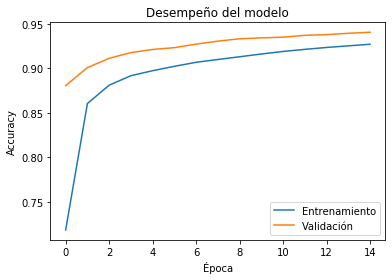

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Desempeño del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='best')

In [ ]:
#Test
scoreFC = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2476 - accuracy: 0.9333


Imagen seleccionada: 1089


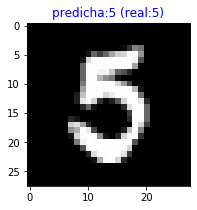

In [ ]:
n_test = np.random.randint(0,10000)
print(f"Imagen seleccionada: {n_test}")

Im_prueba = x_test[n_test,...]
Etiq_prueba = y_test[n_test]

clase_pred = keras.backend.argmax(model.predict(Im_prueba[None,...])).numpy()[0]

plt.figure(figsize=(3,3))
plt.imshow(np.reshape(Im_prueba,(28,28)),cmap='gray')

if clase_pred == Etiq_prueba:
    color = 'blue'
else:
    color = 'red'

plt.title(f"predicha:{yname[clase_pred]} (real:{yname[Etiq_prueba]})",color=color);

Text(0.5, 1.0, 'predicha:1 (real:9)')

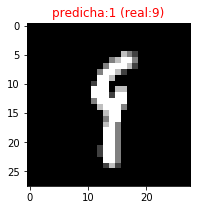

In [ ]:
y_pred = keras.backend.argmax(model.predict(x_test)).numpy()
y_errores = np.where(y_pred != y_test)

n_ = np.random.randint(y_errores[0].shape[0])
n_test_error = y_errores[0][n_]

Im_prueba = x_test[n_test_error,...]
Etiq_prueba = y_test[n_test_error]

clase_pred = y_pred[n_test_error]

plt.figure(figsize=(3,3))
plt.imshow(np.reshape(Im_prueba,(28,28)),cmap='gray')

if clase_pred == Etiq_prueba:
    color = 'blue'
else:
    color = 'red'

plt.title(f"predicha:{yname[clase_pred]} (real:{yname[Etiq_prueba]})",color=color)

# Redes Neuronales Convolucionales

## Convoluciones como máscaras

(-0.5, 766.5, 969.5, -0.5)

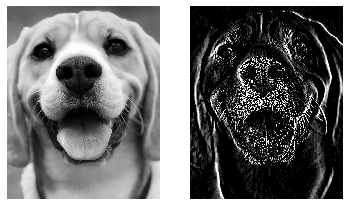

In [ ]:


# convolution_kernel = np.array([[-1, 0, 1],
#                                [-2, 0, 2],
#                                [-1, 0, 1]])

# convolution_kernel = np.array([[1, 0, -1],
#                                [2, 0, -2],
#                                [1, 0, -1]])

# convolution_kernel = np.array([[-1, -2, -1],
#                                [0, 0, 0],
#                                [1, 2, 1]])

# convolution_kernel = np.array([[1, 2, 1],
#                                [0, 0, 0],
#                                [-1, -2, -1]])

# convolution_kernel = np.array([[-1, -1, -1],
#                                [-1, 8, -1],
#                                [-1, -1, -1]])

convolution_kernel = np.array([[3, 0, -3],
                               [10, 0, -10],
                               [3, 0, -3]])

# convolution_kernel = np.array([[0, 1, 0],
#                                [1, -4, 1],
#                                [0, 1, 0]])

image = cv2.imread('perro.jpg')
image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
result = cv2.filter2D(image, -1, convolution_kernel)

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.imshow(result,cmap='gray')
plt.axis('off')

## Redes Neuronales Convolucionales (CNN - Convolutional Neural Network)

In [ ]:
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Activation
from tensorflow.keras.models import Sequential

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
yname = np.arange(10)
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# yname = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


# Escalar las imágenes en el rango [0,1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [ ]:
print(f'''
Tamaños:

x_train: {x_train.shape}
y_train: {y_train.shape}

x_test: {x_test.shape}
y_test: {y_test.shape}''')


Tamaños:

x_train: (60000, 28, 28, 1)
y_train: (60000,)

x_test: (10000, 28, 28, 1)
y_test: (10000,)


### Convoluciones

<img src='figures/ConvEx.gif' width="600" height="600">*Tomado de:* https://eg.bucknell.edu/~cld028/courses/379-FA19/NN/convTF-Walk-Thru.html

### Maxpooling

<img src='figures/maxpool.gif' width="400" height="300">*Tomado de:*
https://nico-curti.github.io/NumPyNet/NumPyNet/layers/maxpool_layer.html

### Definir red convolucional

In [ ]:
#Se crea la red y se entrena con train, se valida con test
num_classes = 10

model = keras.Sequential(
    [
        keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(28, 28, 1)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(128, (3,3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(200, activation='relu'),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)              

<img src='figures/CNN.png'>

*Red Neuronal Convolucional implementada*

__Hecho con:__ http://alexlenail.me/NN-SVG/index.html

In [ ]:
batch_size = 128
epochs = 15

opt = keras.optimizers.SGD(learning_rate=1e-3)#, momentum=0.1)
# opt = keras.optimizers.Adam(learning_rate=1e-2)
# opt = keras.optimizers.Nadam(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, shuffle=True)

Epoch 1/15
422/422 [==============================] - 31s 74ms/step - loss: 2.2965 - accuracy: 0.0997 - val_loss: 2.2886 - val_accuracy: 0.1020
Epoch 2/15
422/422 [==============================] - 32s 76ms/step - loss: 2.2839 - accuracy: 0.1283 - val_loss: 2.2764 - val_accuracy: 0.1652
Epoch 3/15
422/422 [==============================] - 32s 77ms/step - loss: 2.2718 - accuracy: 0.2028 - val_loss: 2.2633 - val_accuracy: 0.2325
Epoch 4/15
422/422 [==============================] - 32s 76ms/step - loss: 2.2575 - accuracy: 0.2657 - val_loss: 2.2462 - val_accuracy: 0.3047
Epoch 5/15
422/422 [==============================] - 32s 76ms/step - loss: 2.2378 - accuracy: 0.3356 - val_loss: 2.2216 - val_accuracy: 0.4117
Epoch 6/15
422/422 [==============================] - 49s 116ms/step - loss: 2.2086 - accuracy: 0.4349 - val_loss: 2.1844 - val_accuracy: 0.5093
Epoch 7/15
422/422 [==============================] - 40s 96ms/step - loss: 2.1626 - accuracy: 0.5212 - val_loss: 2.1237 - val_accuracy

In [ ]:
scoreCNN = model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.4787 - accuracy: 0.8652 0s - loss: 0.4761 - accuracy: 0.


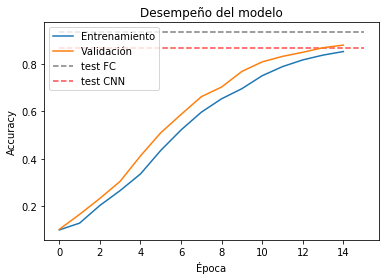

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.hlines(scoreFC[1],0,epochs,linestyles='dashed', alpha=0.5)
plt.hlines(scoreCNN[1],0,epochs,'r',linestyles='dashed', alpha=0.7)
plt.title('Desempeño del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación', 'test FC', 'test CNN'], loc='best')

Imagen seleccionada: 2578


Text(0.5, 1.0, 'predicha:2 (real:7)')

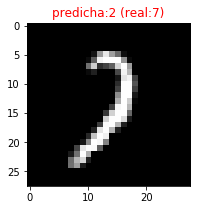

In [ ]:
n_test = np.random.randint(0,10000)
print(f"Imagen seleccionada: {n_test}")

Im_prueba = x_test[n_test,...]
Etiq_prueba = y_test[n_test]

clase_pred = keras.backend.argmax(model.predict(Im_prueba[None,...])).numpy()[0]

plt.figure(figsize=(3,3))
plt.imshow(np.reshape(Im_prueba,(28,28)),cmap='gray')

if clase_pred == Etiq_prueba:
    color = 'blue'
else:
    color = 'red'

plt.title(f"predicha:{yname[clase_pred]} (real:{yname[Etiq_prueba]})",color=color)

Text(0.5, 1.0, 'predicha:9 (real:4)')

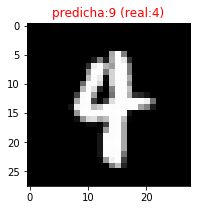

In [ ]:
y_pred = keras.backend.argmax(model.predict(x_test)).numpy()
y_errores = np.where(y_pred != y_test)

n_ = np.random.randint(y_errores[0].shape[0])
n_test_error = y_errores[0][n_]

Im_prueba = x_test[n_test_error,...]
Etiq_prueba = y_test[n_test_error]

clase_pred = y_pred[n_test_error]

plt.figure(figsize=(3,3))
plt.imshow(np.reshape(Im_prueba,(28,28)),cmap='gray')

if clase_pred == Etiq_prueba:
    color = 'blue'
else:
    color = 'red'

plt.title(f"predicha:{yname[clase_pred]} (real:{yname[Etiq_prueba]})",color=color)

### Recursos recomendados:

#### - [Redes Neuronales](https://mlfromscratch.com/neural-networks-explained/#/)
#### - [Funciones de Activación 1](https://mlfromscratch.com/activation-functions-explained/#/)
#### - [Funciones de Activación 2](https://madelinecaples.hashnode.dev/how-neural-networks-work-activation-functions)
#### - [Optimizadores](https://mlfromscratch.com/optimizers-explained/#/)
#### - [Tamaños de Batch](https://svpino.medium.com/size-does-matter-bf64a226fac8)
#### - [CNN Tutorial](https://victorzhou.com/blog/keras-cnn-tutorial/)
#### - [Videos recomendados](https://www.youtube.com/watch?v=jKCQsndqEGQ)

In [ ]:
#Basado y adaptado de:
#https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0

layer_outputs = [layer.output for layer in model.layers[:7]]
# Extrae las salidas de las primeras 7 capas
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)
# Se crea un modelo que retorna estas salidas

In [ ]:
activations = activation_model.predict(Im_prueba[None,...])
len(activations)

7

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 26, 26, 32)


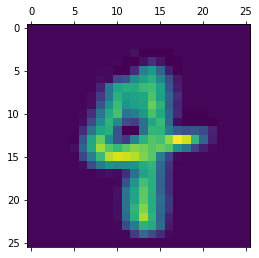

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 11], cmap='viridis')

C:\Users\abelo\anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


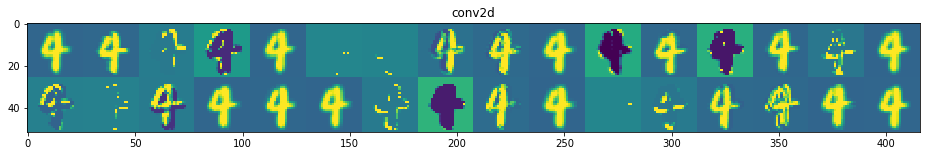

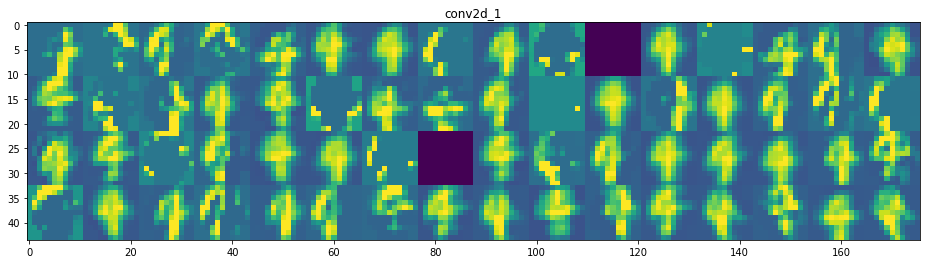

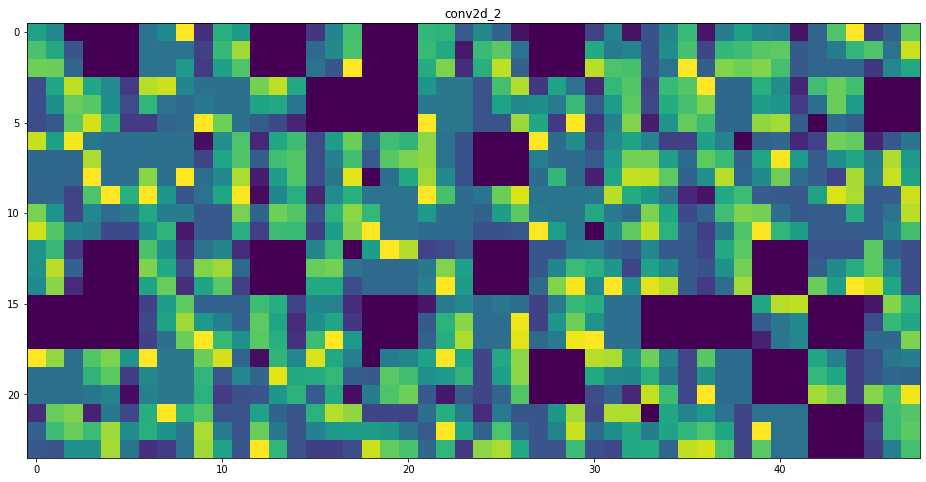

In [ ]:

layer_names = []
for layer in model.layers:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    if 'conv' in layer_name:
        for col in range(n_cols): # Tiles each filter into a big horizontal grid
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, # Displays the grid
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

<img src='figures/RF.png' width="400" height="400">

*Campos receptivos*

__Tomada de:__  https://theaisummer.com/receptive-field/

https://towardsdatascience.com/how-to-visualize-convolutional-features-in-40-lines-of-code-70b7d87b0030